<a href="https://colab.research.google.com/github/Suryaprasadindra/Meals_forecasting_project/blob/main/MealsDelivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary modules**

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Exploring Data sets**

In [306]:
meal_info = pd.read_csv("/content/meal_info.csv")
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [307]:
fulfilment_center_info = pd.read_csv("/content/fulfilment_center_info.csv")
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [308]:
train = pd.read_csv("/content/train.csv")
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [309]:
train.shape

(456548, 9)

In [310]:
# Merging train data with meal info data on 'meal_id'
merged_data = pd.merge(train, meal_info, on='meal_id', how='left')

# Merging the result with fulfillment center data on 'center_id'
merged_data = pd.merge(merged_data, fulfilment_center_info, on='center_id', how='left')

# Display the first few rows of the merged dataset
merged_data_head = merged_data.head()
merged_data_head

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [311]:
merged_data.shape

(456548, 15)

In [312]:
# Check for duplicate rows in the merged_data DataFrame
duplicate_rows = merged_data[merged_data.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 0


In [313]:
# Check for missing values in the merged_data DataFrame
missing_values = merged_data.isnull().sum()

# Print the number of missing values for each column
print("Missing values per column:\n", missing_values)

Missing values per column:
 id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64


In [314]:
merged_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [315]:
merged_data.info() #checking data/variable type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [316]:
# Dropping  the unnecessary colums from merged data
merged_data = merged_data.drop(['id', 'city_code', 'region_code', 'op_area', 'week'], axis=1)

# Display the first few rows of the updated dataset
merged_data.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type
0,55,1885,136.83,152.29,0,0,177,Beverages,Thai,TYPE_C
1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,TYPE_C
2,55,2539,134.86,135.86,0,0,189,Beverages,Thai,TYPE_C
3,55,2139,339.50,437.53,0,0,54,Beverages,Indian,TYPE_C
4,55,2631,243.50,242.50,0,0,40,Beverages,Indian,TYPE_C


In [317]:
merged_data.shape

(456548, 10)

# **EXPLORING DATA ANALYSIS**

In [318]:
merged_data.describe()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [319]:
merged_data.category.nunique() # unique categories in category feature

14

In [320]:
merged_data.cuisine.nunique() # unique cuisines in cuisine feature

4

In [321]:
merged_data.center_type.nunique() # unique center types in center_type feature

3

In [322]:
merged_data.emailer_for_promotion.value_counts() # 0 indicates - not emailed to customers, 1 indicates emailed to customers for promotions

,count
emailer_for_promotion,
0,419498
1,37050


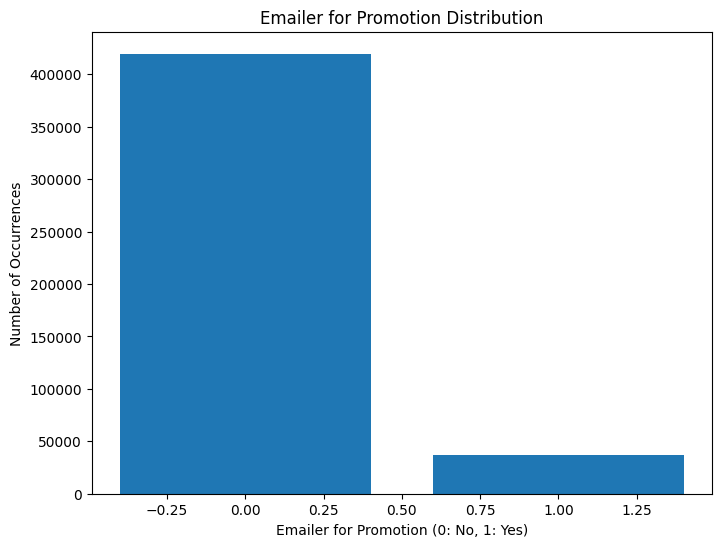

In [323]:
emailer_counts = merged_data['emailer_for_promotion'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(emailer_counts.index, emailer_counts.values)
plt.xlabel('Emailer for Promotion (0: No, 1: Yes)')
plt.ylabel('Number of Occurrences')
plt.title('Emailer for Promotion Distribution')
plt.show()

In [324]:
# Calculating the number of orders from email promotion in 145 weeks
orders_per_email_promotion = merged_data.groupby('emailer_for_promotion')['num_orders'].sum()

orders_per_email_promotion

,num_orders
emailer_for_promotion,
0,96175321
1,23382164


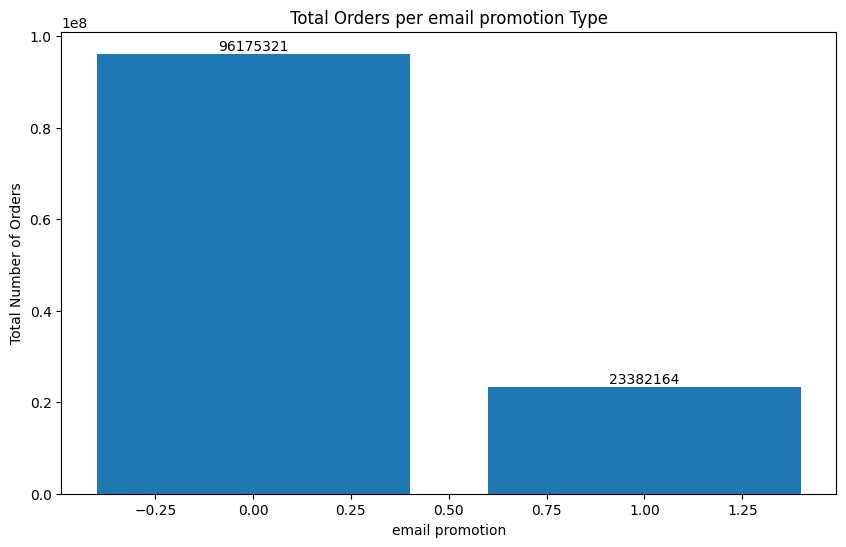

In [325]:
# a bar chart for the 'orders_per_email_promotion' data
plt.figure(figsize=(10, 6))
plt.bar(orders_per_email_promotion.index, orders_per_email_promotion.values)
plt.xlabel('email promotion')
plt.ylabel('Total Number of Orders')
plt.title('Total Orders per email promotion Type')

# Add the count on the top of each bar
for i, v in enumerate(orders_per_email_promotion.values):
  plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [326]:
merged_data.homepage_featured.value_counts() # 0 indicates - not featured the product in home page of website, 1 indicates featured on homepage

,count
homepage_featured,
0,406693
1,49855


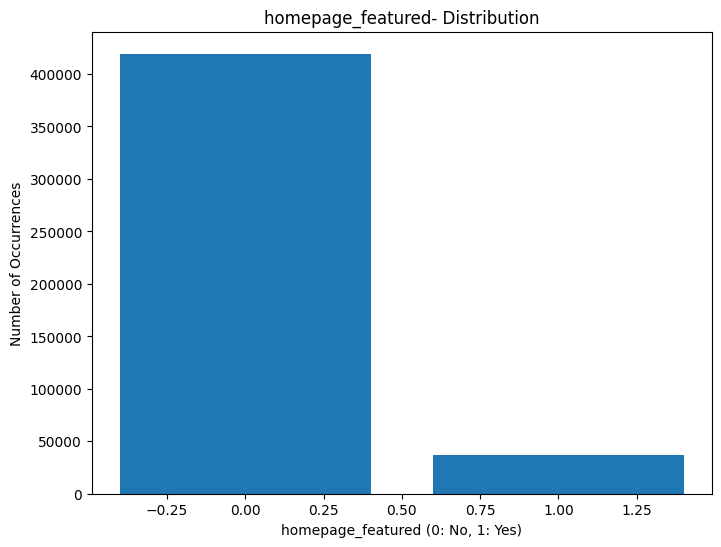

In [327]:
homepage_featured = merged_data['homepage_featured'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(emailer_counts.index, emailer_counts.values)
plt.xlabel('homepage_featured (0: No, 1: Yes)')
plt.ylabel('Number of Occurrences')
plt.title('homepage_featured- Distribution')
plt.show()

In [328]:
# Calculating the number of orders from home page featured  in 145 weeks
orders_per_homepage_featured = merged_data.groupby('homepage_featured')['num_orders'].sum()

orders_per_homepage_featured

,num_orders
homepage_featured,
0,89899504
1,29657981


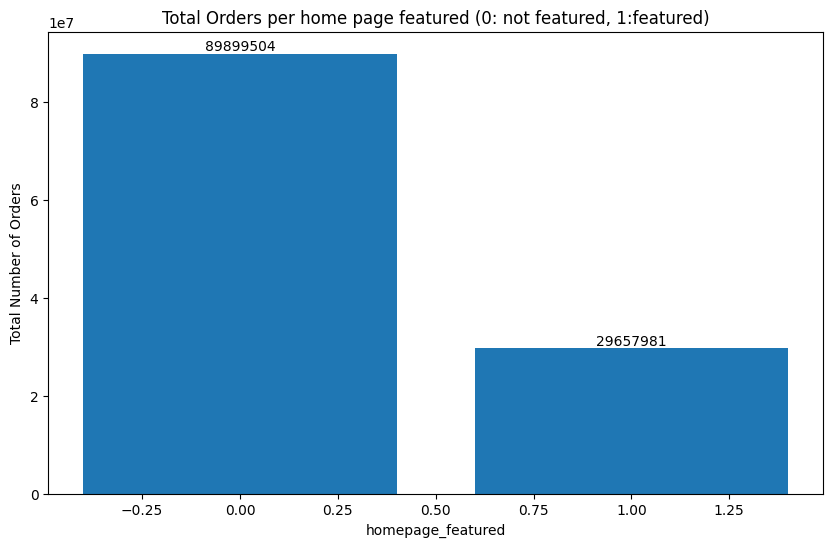

In [329]:
# a bar chart for the 'home page featured' data
plt.figure(figsize=(10, 6))
plt.bar(orders_per_homepage_featured.index, orders_per_homepage_featured.values)
plt.xlabel('homepage_featured')
plt.ylabel('Total Number of Orders')
plt.title('Total Orders per home page featured (0: not featured, 1:featured)')

# Add the count on the top of each bar
for i, v in enumerate(orders_per_homepage_featured.values):
  plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [330]:
merged_data.category.value_counts() #  categories count in 145 weeks

,count
category,
Beverages,127890
Rice Bowl,33408
Sandwich,33291
Pizza,33138
Starters,29941
Other Snacks,29379
Desert,29294
Salad,28559
Pasta,27694


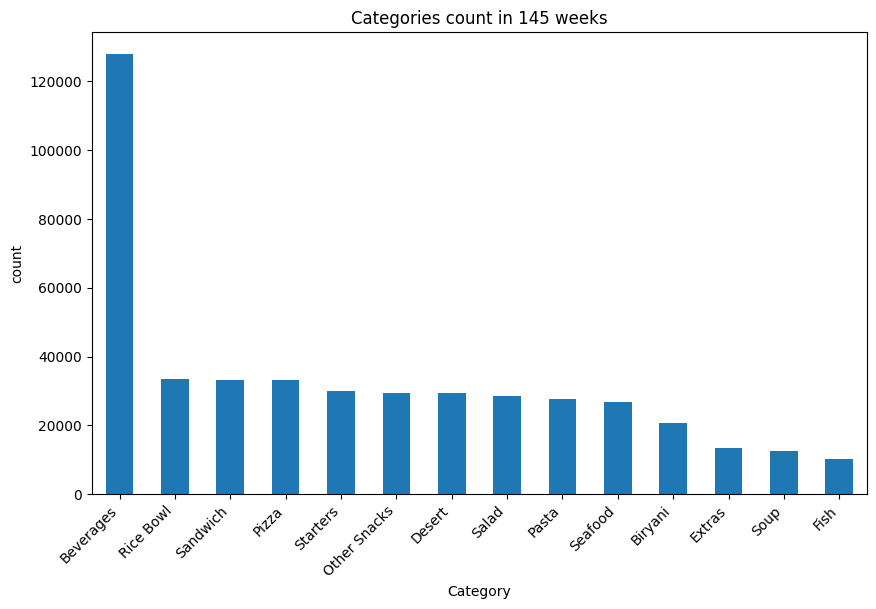

In [331]:
#  categories count
plt.figure(figsize=(10, 6))  #  figure size
merged_data['category'].value_counts().plot(kind='bar')
plt.title('Categories count in 145 weeks')
plt.xlabel('Category')
plt.ylabel('count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


 **describing chart**




1.   *we got highest count from beverages*
2.   *we got less count from fish, followed by soup, extras*



In [332]:
# Calculating the number of orders from home page featured  in 145 weeks
orders_per_category = merged_data.groupby('category')['num_orders'].sum()

orders_per_category

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959
Other Snacks,4766293
Pasta,1637744
Pizza,7383720
Rice Bowl,20874063


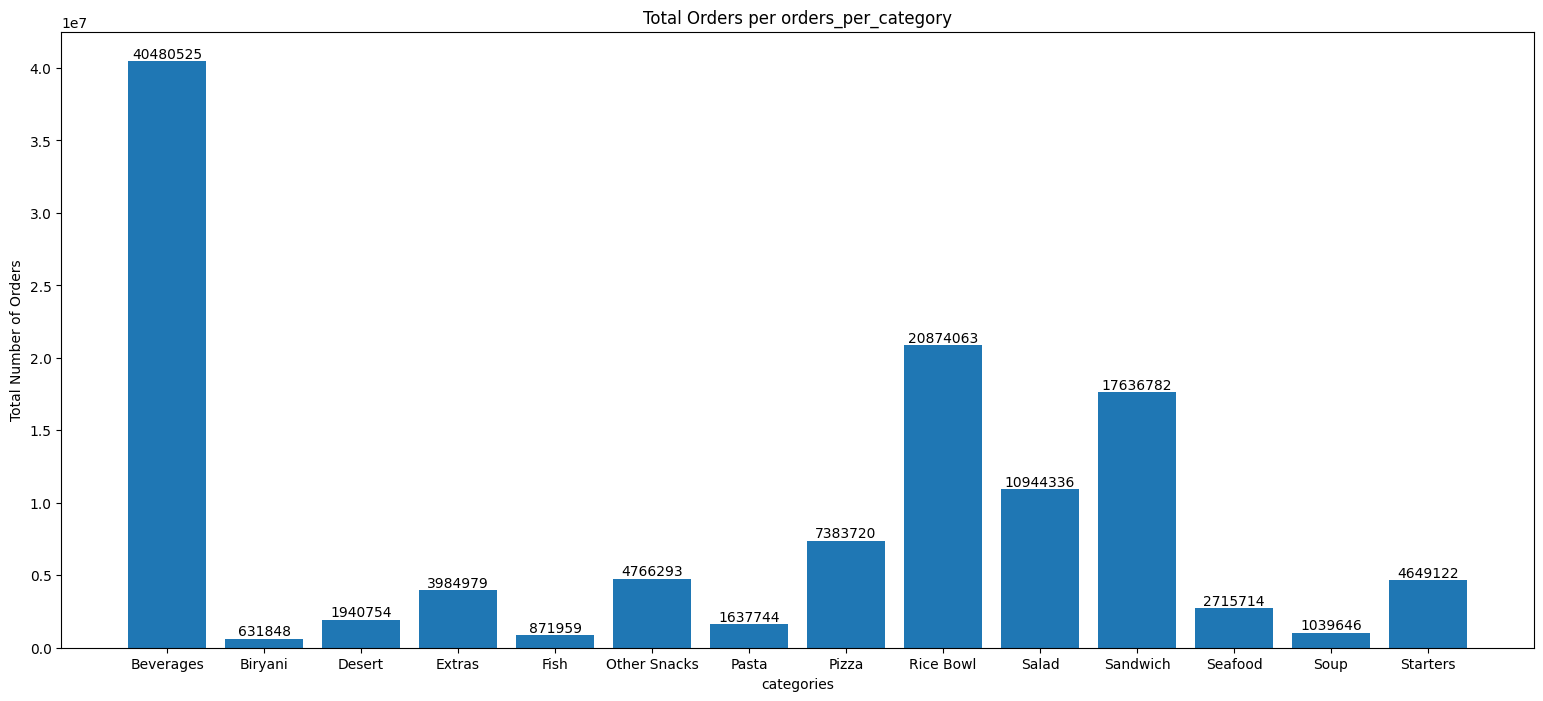

In [333]:
# a bar chart for the 'number of orders per categories'
plt.figure(figsize=(19, 8))
plt.bar(orders_per_category.index, orders_per_category.values)
plt.xlabel('categories')
plt.ylabel('Total Number of Orders')
plt.title('Total Orders per orders_per_category')

# Add the count on the top of each bar
for i, v in enumerate(orders_per_category.values):
  plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [334]:
# Calculate the number of orders from each center type in 145 weeks
orders_per_center_type = merged_data.groupby('center_type')['num_orders'].sum()

orders_per_center_type

,num_orders
center_type,
TYPE_A,68978517
TYPE_B,29996073
TYPE_C,20582895


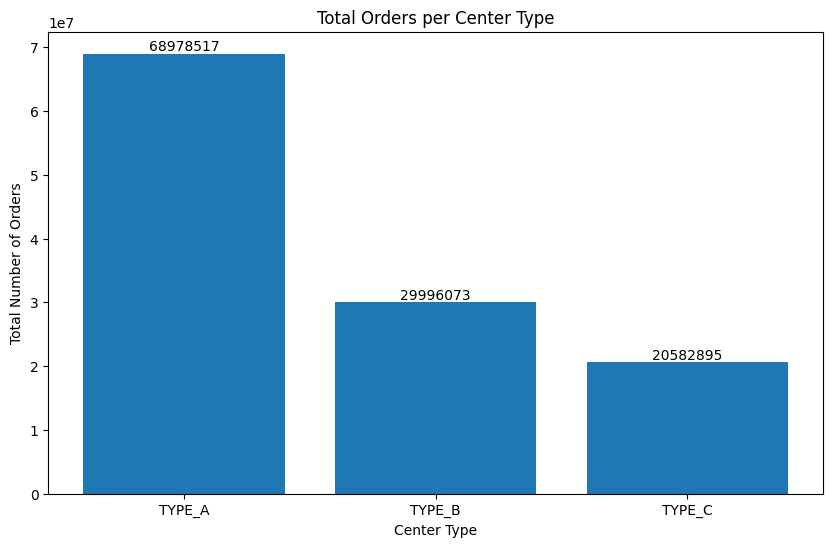

In [335]:
# Calculate the number of orders from each center type
orders_per_center_type = merged_data.groupby('center_type')['num_orders'].sum()

#a bar chart for the 'orders_per_center_type' data
plt.figure(figsize=(10, 6))
plt.bar(orders_per_center_type.index, orders_per_center_type.values)
plt.xlabel('Center Type')
plt.ylabel('Total Number of Orders')
plt.title('Total Orders per Center Type')

# Add the count on the top of each bar
for i, v in enumerate(orders_per_center_type.values):
  plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [336]:
# Calculate the number of orders from each cusine type in 145 weeks
orders_per_cusine_type = merged_data.groupby('cuisine')['num_orders'].sum()

orders_per_cusine_type

,num_orders
cuisine,
Continental,16914439
Indian,25792544
Italian,44172832
Thai,32677670


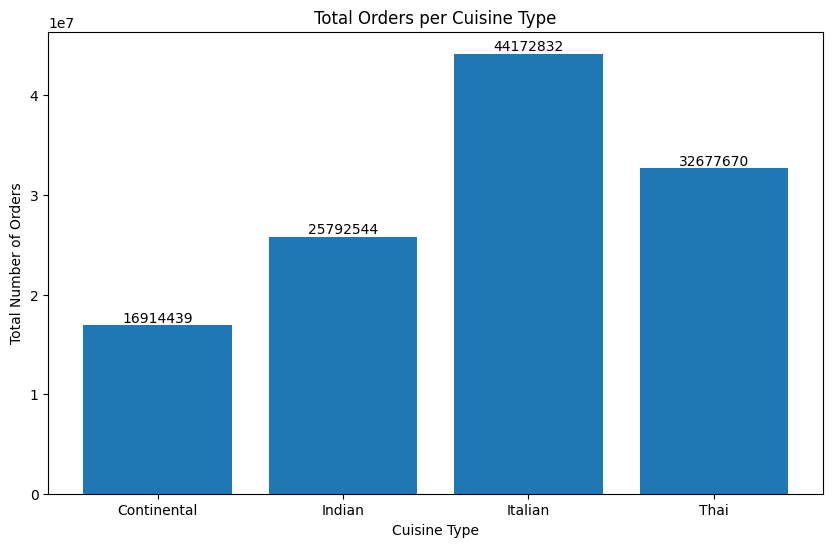

In [337]:
# Create a bar chart for the 'orders_per_cuisine_type' data
plt.figure(figsize=(10, 6))
plt.bar(orders_per_cusine_type.index, orders_per_cusine_type.values)
plt.xlabel('Cuisine Type')
plt.ylabel('Total Number of Orders')
plt.title('Total Orders per Cuisine Type')

# Add the count on the top of each bar
for i, v in enumerate(orders_per_cusine_type.values):
  plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [338]:

# Calculating average, min, and max checkout_price per category
category_checkout_stats = merged_data.groupby('category')['checkout_price'].agg(['mean', 'min', 'max'])
print("Checkout Price Statistics by Category:\n", category_checkout_stats)

# Calculating average, min, and max checkout_price per cuisine
cuisine_checkout_stats = merged_data.groupby('cuisine')['checkout_price'].agg(['mean', 'min', 'max'])
print("\nCheckout Price Statistics by Cuisine:\n", cuisine_checkout_stats)

# Calculating average, min, and max checkout_price per center_type
center_checkout_stats = merged_data.groupby('center_type')['checkout_price'].agg(['mean', 'min', 'max'])
print("\nCheckout Price Statistics by Center Type:\n", center_checkout_stats)

Checkout Price Statistics by Category:
                     mean     min     max
category                                
Beverages     213.264024    2.97  532.53
Biryani       450.405156   99.00  505.43
Desert        437.600166   98.00  738.23
Extras        173.193299   55.35  340.53
Fish          578.992080  291.03  642.14
Other Snacks  258.132368   97.00  321.13
Pasta         395.663210   78.57  670.27
Pizza         584.004146  389.00  728.53
Rice Bowl     317.532240   56.26  504.43
Salad         290.955440   83.48  485.03
Sandwich      289.988999   82.45  409.40
Seafood       610.598550  145.53  866.27
Soup          222.949614  156.17  272.63
Starters      278.271997  162.05  321.13

Checkout Price Statistics by Cuisine:
                    mean    min     max
cuisine                               
Continental  515.978809   2.97  866.27
Indian       340.769833  45.62  738.23
Italian      285.133102  78.57  670.27
Thai         213.323235  55.35  340.53

Checkout Price Statistics by 

# **FEATURE ENGINEERING**

In [339]:
merged_data.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type
0,55,1885,136.83,152.29,0,0,177,Beverages,Thai,TYPE_C
1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,TYPE_C
2,55,2539,134.86,135.86,0,0,189,Beverages,Thai,TYPE_C
3,55,2139,339.50,437.53,0,0,54,Beverages,Indian,TYPE_C
4,55,2631,243.50,242.50,0,0,40,Beverages,Indian,TYPE_C


In [340]:
# creating a new discount variable - if checkout price is less than base price, which means giving some discount.

# Create a new column 'discount_applied'
merged_data['discount_applied'] = np.where(merged_data['checkout_price'] < merged_data['base_price'], 1, 0)

# Display the first few rows of the updated dataset to see the new column
merged_data.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type,discount_applied
0,55,1885,136.83,152.29,0,0,177,Beverages,Thai,TYPE_C,1
1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,TYPE_C,0
2,55,2539,134.86,135.86,0,0,189,Beverages,Thai,TYPE_C,1
3,55,2139,339.50,437.53,0,0,54,Beverages,Indian,TYPE_C,1
4,55,2631,243.50,242.50,0,0,40,Beverages,Indian,TYPE_C,0


In [341]:
# Dropping 'checkout_price' and 'base_price' columns
merged_data = merged_data.drop(['checkout_price', 'base_price'], axis=1)

# Display the first few rows of the updated dataset
merged_data.head()

,center_id,meal_id,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type,discount_applied
0,55,1885,0,0,177,Beverages,Thai,TYPE_C,1
1,55,1993,0,0,270,Beverages,Thai,TYPE_C,0
2,55,2539,0,0,189,Beverages,Thai,TYPE_C,1
3,55,2139,0,0,54,Beverages,Indian,TYPE_C,1
4,55,2631,0,0,40,Beverages,Indian,TYPE_C,0


# **Handling categorical variables and one hot encoding**

In [342]:
# Group by 'category' and 'meal_id' to see subcategories within each category with their meal IDs
category_meal_subcategories = merged_data.groupby(['category', 'meal_id'])['cuisine'].first().reset_index()

# Display the result
category_meal_subcategories

,category,meal_id,cuisine
0,Beverages,1062,Italian
1,Beverages,1207,Continental
2,Beverages,1230,Continental
3,Beverages,1248,Indian
4,Beverages,1778,Italian
5,Beverages,1885,Thai
6,Beverages,1993,Thai
7,Beverages,2139,Indian
8,Beverages,2322,Continental
9,Beverages,2539,Thai


**NOTE : By exploring data set ( you can see same type of category with different meal_id which means there are subcategories), we can understand that meal_id variable is already explaing alone about category and cusine of order.**
  

1. So, we can remove these 2 (category, cuisine) variables and keep meal_id and perform one hot encoding.
2. we can drop meal id and keep these 2 variables as well but the problem is under each category or cusine type, there are subcategories which can explain by meal_id variable only



In [343]:
# Drop 'category' and 'cuisine' columns
merged_data = merged_data.drop(['category', 'cuisine'], axis=1)

# Display the first few rows of the updated dataset
merged_data.head()

,center_id,meal_id,emailer_for_promotion,homepage_featured,num_orders,center_type,discount_applied
0,55,1885,0,0,177,TYPE_C,1
1,55,1993,0,0,270,TYPE_C,0
2,55,2539,0,0,189,TYPE_C,1
3,55,2139,0,0,54,TYPE_C,1
4,55,2631,0,0,40,TYPE_C,0


**NOTE:** CENTER_ID AND CENTER_TYPE VARIABLES ARE EXPLAING SAME INFORMATION, BUT CENTER_ID WILL EXPLAIN ABOUT EACH FULFILLMENT CENTERS RATHER THAN JUST CATEGORY TYPE. IF WE DO ONE HOT ENCODING FOR CENTER_ID, WE WILL GET LOT OF COLUMNS FOR MODEL, AS THIS IS NOT RIGHT APPROACH FOR MACHINE LEARNING MODEL.(ONE EX: IN MULTIPLE LINEAR REGRESSION, BY INCREASING COLUMNS WILL SLIGHTLY INCREASE R2 EVEN IT DOESN'T EXPLAIN VARIANCE OF DEPENDENT VARIABLE OR MODEL WILL HAVE OVERFITTING PROBLEM AS IT TRIES TO CAPTURE NOISE)

In [344]:
# Drop 'center_id' column
merged_data = merged_data.drop(['center_id'], axis=1)

# Display the first few rows of the updated dataset
merged_data.head()

,meal_id,emailer_for_promotion,homepage_featured,num_orders,center_type,discount_applied
0,1885,0,0,177,TYPE_C,1
1,1993,0,0,270,TYPE_C,0
2,2539,0,0,189,TYPE_C,1
3,2139,0,0,54,TYPE_C,1
4,2631,0,0,40,TYPE_C,0


In [346]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   meal_id                456548 non-null  int64 
 1   emailer_for_promotion  456548 non-null  int64 
 2   homepage_featured      456548 non-null  int64 
 3   num_orders             456548 non-null  int64 
 4   center_type            456548 non-null  object
 5   discount_applied       456548 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 20.9+ MB


In [347]:
# Perform one-hot encoding on the 'center_type' column
merged_data = pd.get_dummies(merged_data, columns=['center_type'], prefix=['center_type']).astype(int)

# Display the first few rows of the updated dataset
merged_data.head()

,meal_id,emailer_for_promotion,homepage_featured,num_orders,discount_applied,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,1885,0,0,177,1,0,0,1
1,1993,0,0,270,0,0,0,1
2,2539,0,0,189,1,0,0,1
3,2139,0,0,54,1,0,0,1
4,2631,0,0,40,0,0,0,1


In [349]:
# Drop 'center_type_C' column to avoid multicollinearity
merged_data = merged_data.drop('center_type_TYPE_C', axis=1)

# Display the first few rows of the updated dataset
merged_data.head()

,meal_id,emailer_for_promotion,homepage_featured,num_orders,discount_applied,center_type_TYPE_A,center_type_TYPE_B
0,1885,0,0,177,1,0,0
1,1993,0,0,270,0,0,0
2,2539,0,0,189,1,0,0
3,2139,0,0,54,1,0,0
4,2631,0,0,40,0,0,0


In [350]:
# Perform one-hot encoding on the 'meal_id' column
merged_data = pd.get_dummies(merged_data, columns=['meal_id'], prefix=['meal_id']).astype(int)

# Display the first few rows of the updated dataset
merged_data.head()

,emailer_for_promotion,homepage_featured,num_orders,discount_applied,center_type_TYPE_A,center_type_TYPE_B,meal_id_1062,meal_id_1109,meal_id_1198,meal_id_1207,...,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956
0,0,0,177,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,270,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,189,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,54,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,40,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [351]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 57 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   emailer_for_promotion  456548 non-null  int64
 1   homepage_featured      456548 non-null  int64
 2   num_orders             456548 non-null  int64
 3   discount_applied       456548 non-null  int64
 4   center_type_TYPE_A     456548 non-null  int64
 5   center_type_TYPE_B     456548 non-null  int64
 6   meal_id_1062           456548 non-null  int64
 7   meal_id_1109           456548 non-null  int64
 8   meal_id_1198           456548 non-null  int64
 9   meal_id_1207           456548 non-null  int64
 10  meal_id_1216           456548 non-null  int64
 11  meal_id_1230           456548 non-null  int64
 12  meal_id_1247           456548 non-null  int64
 13  meal_id_1248           456548 non-null  int64
 14  meal_id_1311           456548 non-null  int64
 15  meal_id_1438     

In [352]:
# dropping meal_id_2956 to avoid multicollinearity problem
merged_data = merged_data.drop('meal_id_2956', axis=1)

# Displaying the first few rows of the updated dataset
merged_data.head()

,emailer_for_promotion,homepage_featured,num_orders,discount_applied,center_type_TYPE_A,center_type_TYPE_B,meal_id_1062,meal_id_1109,meal_id_1198,meal_id_1207,...,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867
0,0,0,177,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,270,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,189,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,54,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,40,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [353]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   emailer_for_promotion  456548 non-null  int64
 1   homepage_featured      456548 non-null  int64
 2   num_orders             456548 non-null  int64
 3   discount_applied       456548 non-null  int64
 4   center_type_TYPE_A     456548 non-null  int64
 5   center_type_TYPE_B     456548 non-null  int64
 6   meal_id_1062           456548 non-null  int64
 7   meal_id_1109           456548 non-null  int64
 8   meal_id_1198           456548 non-null  int64
 9   meal_id_1207           456548 non-null  int64
 10  meal_id_1216           456548 non-null  int64
 11  meal_id_1230           456548 non-null  int64
 12  meal_id_1247           456548 non-null  int64
 13  meal_id_1248           456548 non-null  int64
 14  meal_id_1311           456548 non-null  int64
 15  meal_id_1438     

In [357]:
# Calculate the correlation matrix to check multicollinearity with any independent features by each other.
correlation_matrix = merged_data.corr()

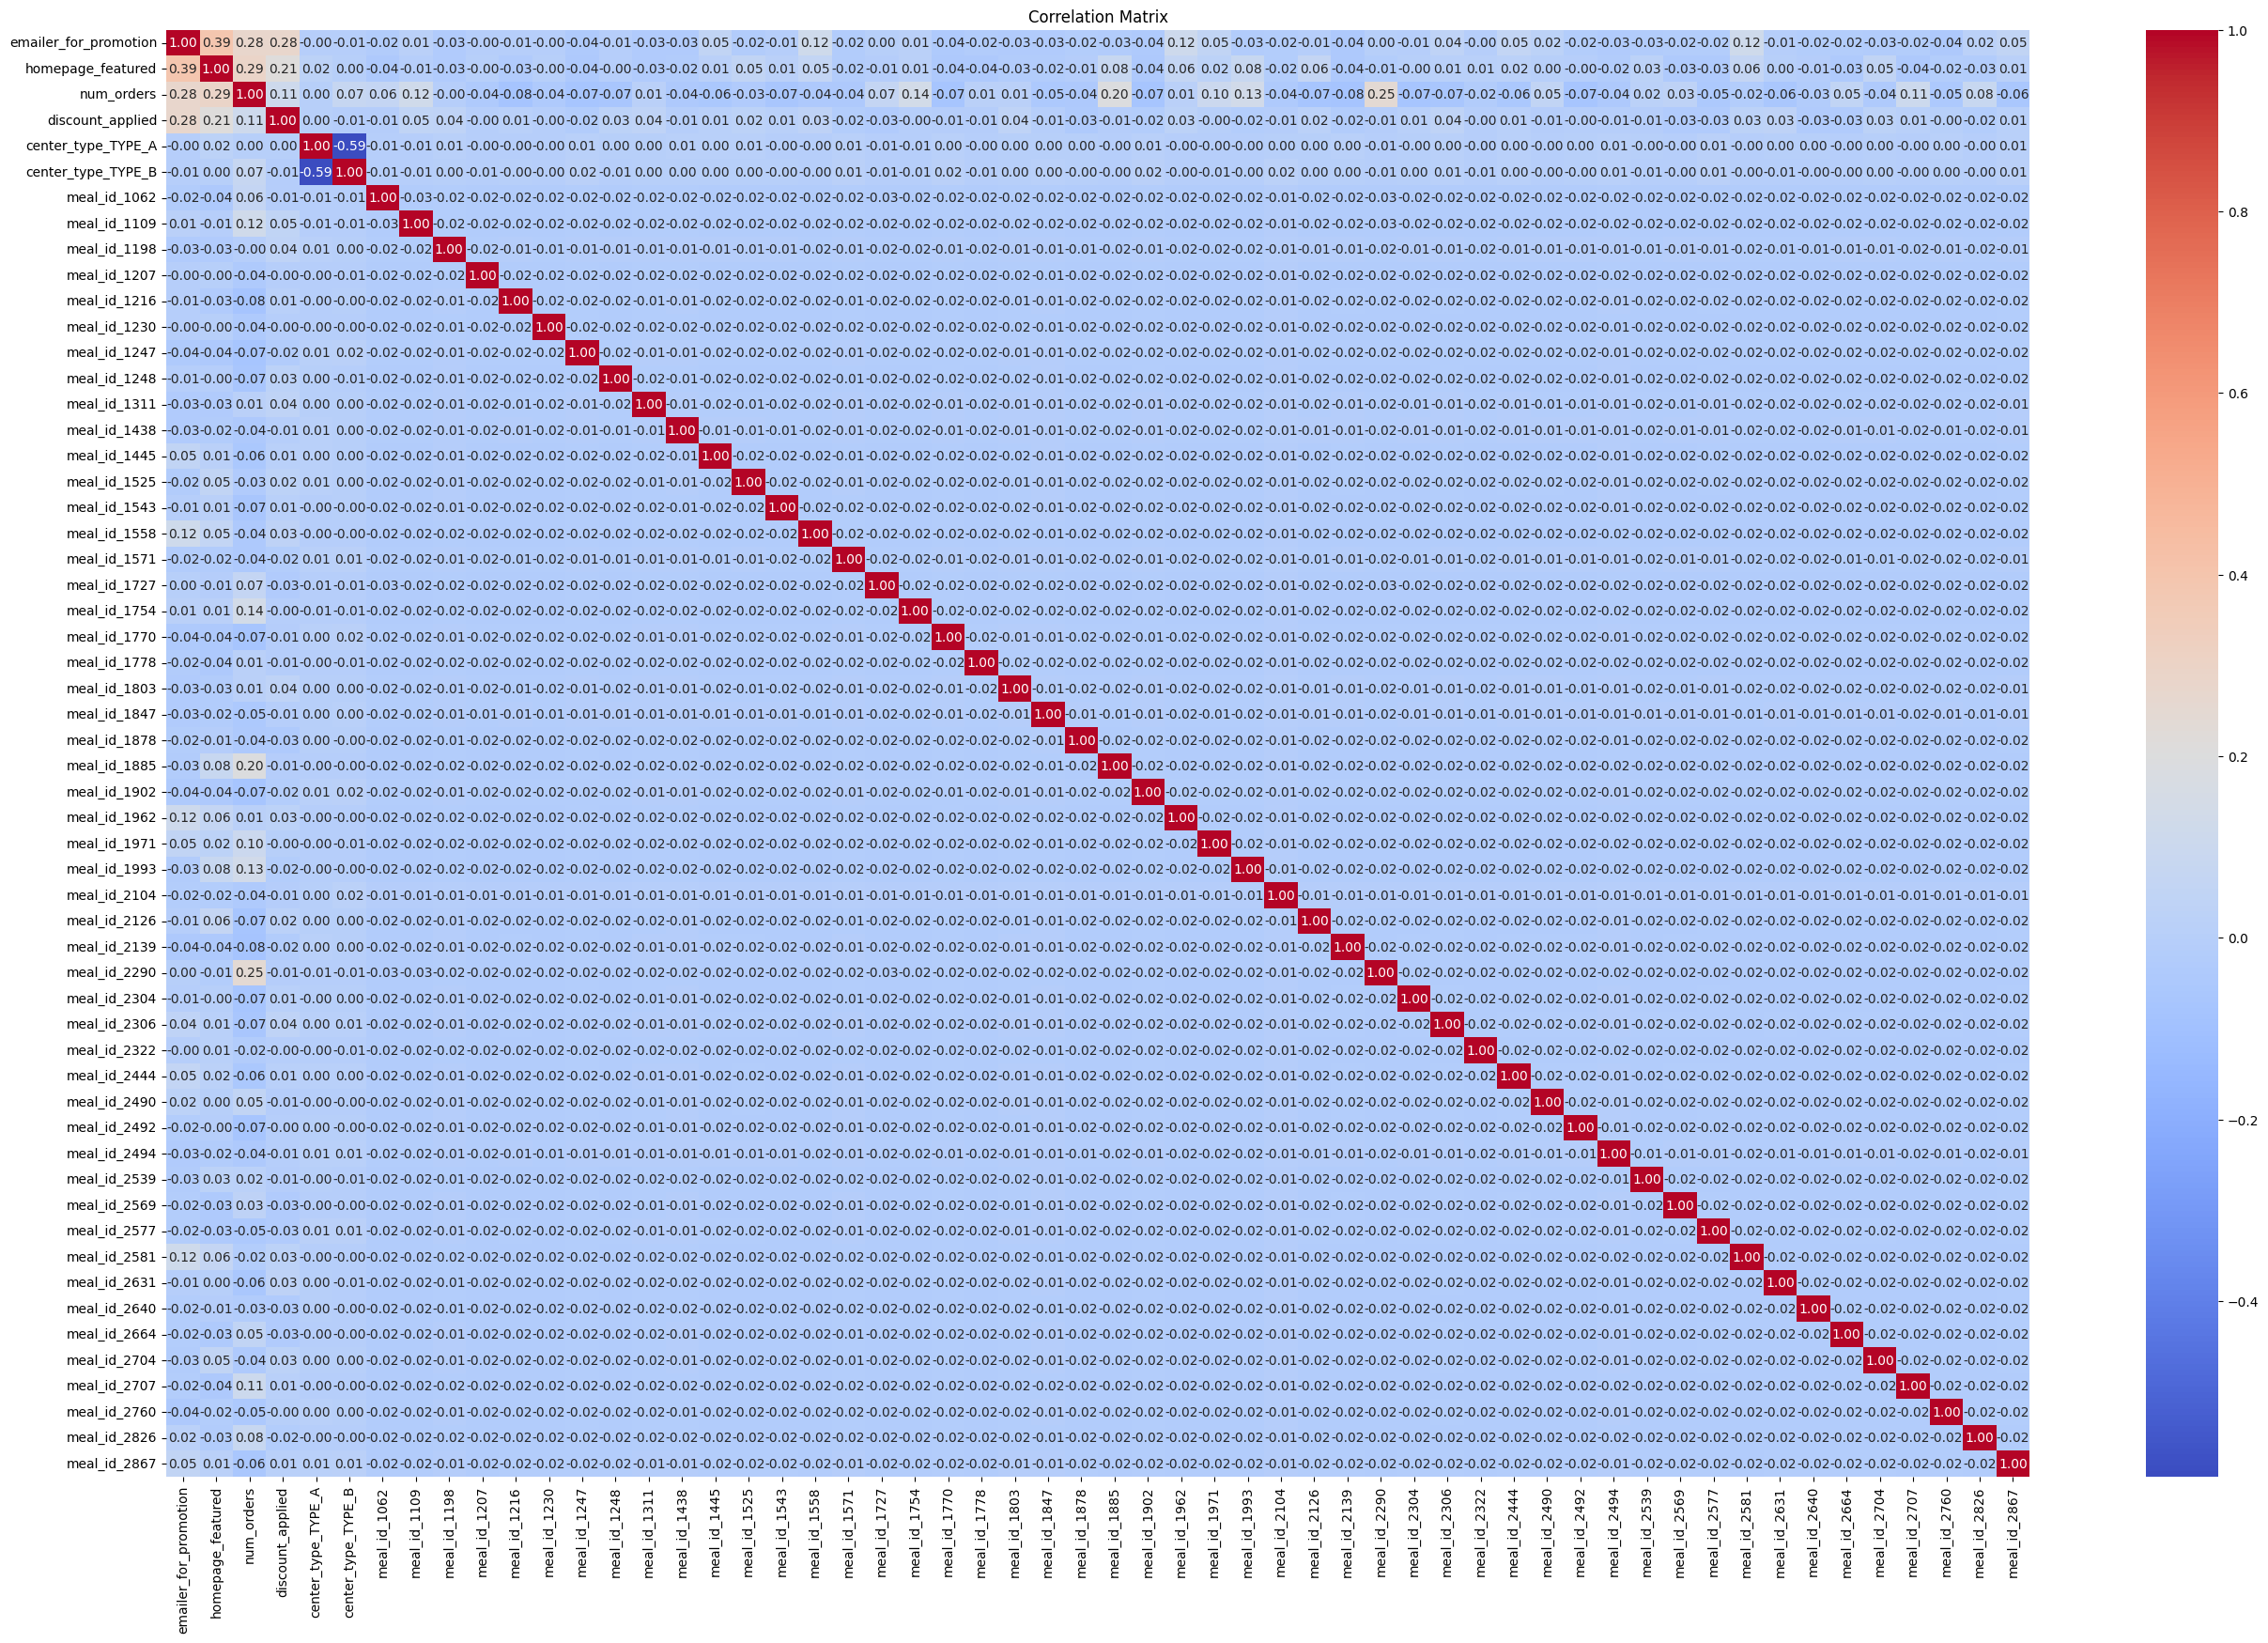

In [358]:
# visualize the correlation matrix using a heatmap
plt.figure(figsize=(32, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



1.BY CHECKING CORRELATION HEATMAP, WE CAN NOTICE THAT THERE IS NO HIGH CORRELATION BETWEEN INDEPENDENT FEATURES

#**ANN-ModeL ( DEEP LEARNING) ALGORITHIM**

In [359]:
merged_data.shape

(456548, 56)

In [360]:
merged_data.head()

,emailer_for_promotion,homepage_featured,num_orders,discount_applied,center_type_TYPE_A,center_type_TYPE_B,meal_id_1062,meal_id_1109,meal_id_1198,meal_id_1207,...,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867
0,0,0,177,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,270,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,189,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,54,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,40,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [361]:
# Split the data into features (X) and target (y)
X = merged_data.drop('num_orders', axis=1)
y = merged_data['num_orders']

In [363]:
X.head()

,emailer_for_promotion,homepage_featured,discount_applied,center_type_TYPE_A,center_type_TYPE_B,meal_id_1062,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,...,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [366]:
X.shape

(456548, 55)

In [365]:
y.head()

,num_orders
0,177
1,270
2,189
3,54
4,40


In [367]:
y.shape

(456548,)

In [371]:
# Import necessary libraries for ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the ANN model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test MAE:', mae)

# Make predictions on the test set
y_pred_ann = model.predict(X_test)

# Calculate R-squared
r2_ann = r2_score(y_test, y_pred_ann)
print("R-squared (ANN):", r2_ann)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9131/9131 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 99901.3750 - mae: 150.1014 - val_loss: 66404.9844 - val_mae: 130.5214
Epoch 2/50
9131/9131 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 74230.7188 - mae: 130.8364 - val_loss: 65189.4648 - val_mae: 128.2590
Epoch 3/50
9131/9131 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 75597.6484 - mae: 131.1194 - val_loss: 66789.7188 - val_mae: 135.1929
Epoch 4/50
9131/9131 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 72960.8750 - mae: 129.3318 - val_loss: 65354.5195 - val_mae: 127.2220
Epoch 5/50
9131/9131 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 73933.9453 - mae: 129.5313 - val_loss: 65379.1016 - val_mae: 132.6080
Epoch 6/50
9131/9131 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 76679.8516 - mae: 130.1092 - val_loss: 64820.6367 - val_mae: 129.5212
Epoch 7/50
9131/9131 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 72572.8047 - mae: 130.0824 - val_loss: 65581.0781 - val_mae: 130.8442
Epoch 8/50
9131/9131 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 71433.